In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"


In [124]:
from deep_Q_learning import train, self_train, grid_to_state_tensor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

In [3]:
import pickle

In [6]:
TRAIN = False
COLORS = ['tab:'+i for i in ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']]

In [30]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

## Question 11 
Plot average reward and average training loss for every 250 games during training. Does the loss decrease? Does the agent learn to play Tic Tac Toe?

In [7]:
if TRAIN or not os.path.isfile('dqn_checkpoint/q11.pkl'):
    eps_agent_to_results = {}
    for eps_agent in range(10):
        eps_agent = eps_agent/10
        _, losses, rewards, Mrands, Mopts = train(eps_agent=eps_agent, nb_epochs=20000,seed=123)
        eps_agent_to_results[eps_agent] = (losses, rewards, Mrands, Mopts)
    with open('dqn_checkpoint/q11.pkl','wb') as f:
        pickle.dump(eps_agent_to_results, f)
else:
    eps_agent_to_results = pickle.load(open('dqn_checkpoint/q11.pkl','rb'))

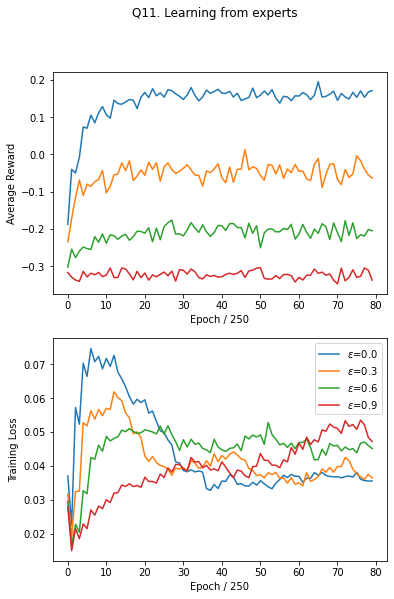

In [16]:
fig, axs = plt.subplots(2, figsize=(6,9))
for eps in [0,0.3,0.6,0.9]:
    axs[0].plot(eps_agent_to_results[eps][1], label=r"$\epsilon$=" + '{:.1f}'.format(eps))
    axs[1].plot(eps_agent_to_results[eps][0], label=r"$\epsilon$=" + '{:.1f}'.format(eps))
    
axs[0].set_xlabel('Epoch / 250')
axs[1].set_xlabel('Epoch / 250')
axs[0].set_ylabel('Average Reward')
axs[1].set_ylabel('Training Loss')

plt.suptitle('Q11. Learning from experts')

plt.legend()
plt.savefig('dqn_plots/q11.png')

plt.show()

The loss first increases then decreases. Agent can learn to play since the rewards increase over time

# Question 12
Repeat the training but without the replay buffer and with a batch size of 1: At every step, update the network by using only the latest transition. What do you observe?

In [9]:
if TRAIN or not os.path.isfile('dqn_checkpoint/q12.pkl'):
    _, losses, rewards, Mrands, Mopts = train(eps_agent=0.0, buffer_size=1, batch_size=1, nb_epochs=20000,seed=123)
    with open('dqn_checkpoint/q12.pkl','wb') as f:
        pickle.dump((losses, rewards,Mrands,Mopts), f)
else:
    losses, rewards, Mrands, Mopt = pickle.load(open('dqn_checkpoint/q12.pkl','rb'))

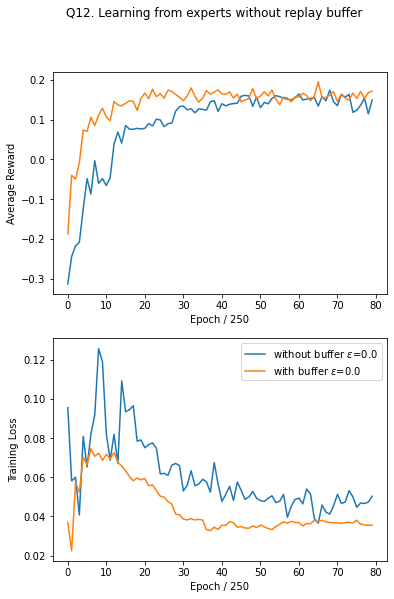

In [18]:
fig, axs = plt.subplots(2,figsize=(6,9))
axs[0].plot(rewards, label="without buffer "+r"$\epsilon$=0.0")
axs[0].plot(eps_agent_to_results[0.0][1], label="with buffer "+r"$\epsilon$=0.0")
axs[0].set_xlabel('Epoch / 250')
axs[0].set_ylabel('Average Reward')

axs[1].plot(losses, label="without buffer "+r"$\epsilon$=0.0")
axs[1].plot(eps_agent_to_results[0.0][0], label="with buffer "+r"$\epsilon$=0.0")
axs[1].set_xlabel('Epoch / 250')
axs[1].set_ylabel('Training Loss')

plt.suptitle('Q12. Learning from experts without replay buffer')

plt.legend()
plt.savefig('dqn_plots/q12.png')

plt.show()

The loss is more fluctuated and the rewards are smaller

Instead of fixing eps, use eps(n) in Equation 1. For different values of n\*,  run your DQN against Opt(0.5) for 20000 games – switch the 1st player after every game. Choose several values of n* from a reasonably wide interval between 1 to 40’000 – particularly, include n* = 1

## Question 13 
After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents. Plot Mopt and Mrand over time. Does decreasing eps help training compared to having a fixed ? What is the effect of n* ?

In [19]:
if TRAIN or not os.path.isfile('dqn_checkpoint/q13.pkl'):
    n_star_to_results={}
    for max_epoch in [1, 10, 100, 1000, 5000, 10000, 20000, 40000]:
        _, rewards, losses, Mrands, Mopts = train(decay_eps=True, max_epoch= max_epoch, nb_epochs=20000,seed=123)
        n_star_to_results[max_epoch] = (rewards, losses, Mrands, Mopts)

    with open('dqn_checkpoint/q13.pkl','wb') as f:
        pickle.dump(n_star_to_results, f)
else:
    n_star_to_results = pickle.load(open('dqn_checkpoint/q13.pkl','rb'))

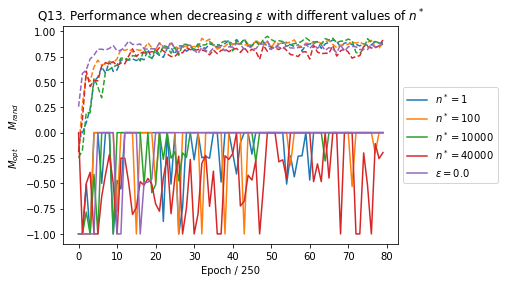

In [67]:
for i, n in enumerate([1, 100,10000,40000]):
    plt.plot( n_star_to_results[n][2], linestyle='dashed', color=COLORS[i])
    plt.plot( n_star_to_results[n][3], color=COLORS[i], label=r'$n^* = $'+str(n))

plt.plot( eps_agent_to_results[0][2], linestyle='dashed', color=COLORS[i+1])
plt.plot( eps_agent_to_results[0][3], color=COLORS[i+1], label=r'$\epsilon = 0.0$')
plt.ylabel(r'$M_{opt}$      $M_{rand}$')
plt.xlabel('Epoch / 250')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Q13. Performance when decreasing $\epsilon$ with different values of $n^*$')
plt.savefig('dqn_plots/q13.png', bbox_inches='tight')
plt.show()

Choose the best value of n* that you found. Run DQN against Opt(eps_opt) for different values of eps_opt for 20000 games – switch the 1st player after every game. Choose several values of eps_opt from a reasonably wide interval between 0 to 1 – particularly, include eps_opt = 0.
## Question 14
After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents for each value of eps_opt. Plot Mopt and Mrand over time. What do you observe? How can you explain it?

In [48]:
best_max_epoch=10000

In [49]:
if TRAIN or not os.path.isfile('dqn_checkpoint/q14.pkl'):
    eps_opt_to_results={}
    for eps_opt in range(10):
        eps_opt = eps_opt/10
        _, rewards, losses, Mrands, Mopts = train(eps_opt=eps_opt, decay_eps=True, max_epoch= best_max_epoch, nb_epochs=20000,seed=123)
        eps_opt_to_results[eps_opt] = (rewards, losses, Mrands, Mopts)

    with open('dqn_checkpoint/q14.pkl','wb') as f:
        pickle.dump(eps_opt_to_results, f)
else:
    eps_opt_to_results = pickle.load(open('dqn_checkpoint/q14.pkl','rb'))
    

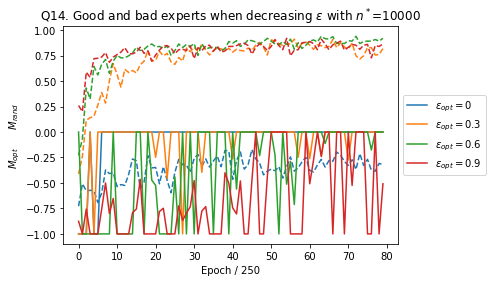

In [66]:
for i, eps in enumerate([0, 0.3,0.6,0.9]):
    plt.plot( eps_opt_to_results[eps][2], linestyle='dashed', color=COLORS[i])
    plt.plot( eps_opt_to_results[eps][3], color=COLORS[i], label=r'$\epsilon_{opt} = $'+str(eps))
    
plt.ylabel(r'$M_{opt}$      $M_{rand}$')
plt.xlabel('Epoch / 250')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Q14. Good and bad experts when decreasing $\epsilon$ with $n^*$={}'.format(best_max_epoch))
plt.savefig('dqn_plots/q14.png', bbox_inches='tight')
plt.show()


## Question 15
What are the highest values of Mopt and Mrand that you could achieve after playing 20000 games?

In [70]:
max(((k,max(v[2])) for k,v in eps_opt_to_results.items()), key=lambda x: x[1]) # Mrand

(0.5, 0.952)

In [71]:
max(((k,max(v[3])) for k,v in eps_opt_to_results.items()), key=lambda x: x[1]) # Mopt

(0.0, 0.0)

In [72]:
max(((k,max(v[2])) for k,v in n_star_to_results.items()), key=lambda x: x[1]) # Mrand

(10000, 0.952)

In [73]:
max(((k,max(v[3])) for k,v in n_star_to_results.items()), key=lambda x: x[1]) # Mopt

(1, 0.0)

In [119]:
key, value = max(((k,max(v[2])) for k,v in n_star_to_results.items()), key=lambda x: x[1]) # Mrand
for i, M_rand in enumerate(n_star_to_results[key][2]):
    if M_rand >= 0.8*value:
        print(i*250+250)
        break
for i, M_opt in enumerate(n_star_to_results[key][3]):
    if M_opt >= -0.2:
        print(i*250+250)
        break

4500
1750


In [74]:
max(((k,max(v[2])) for k,v in eps_agent_to_results.items()), key=lambda x: x[1]) # Mrand

(0.1, 0.928)

In [76]:
max(((k,max(v[3])) for k,v in eps_agent_to_results.items()), key=lambda x: x[1]) # Mopt

(0.0, 0.0)

## Question 16
After every 250 games during training, compute the ‘test’ Mopt and Mrand for different values of eps ∈\[0, 1). Plot Mopt and Mrand over time. Does the agent learn to play Tic Tac Toe? What is the effect of eps?

In [80]:
if TRAIN or not os.path.isfile('dqn_checkpoint/q16.pkl'):
    self_eps_agent_to_results={}
    for eps_agent in range(10):
        eps_agent = eps_agent/10
        _, rewards, losses, Mrands, Mopts = self_train(eps_agent=eps_agent, decay_eps=False, nb_epochs=20000,seed=123)
        self_eps_agent_to_results[eps_agent] = (rewards, losses, Mrands, Mopts)

    with open('dqn_checkpoint/q16.pkl','wb') as f:
        pickle.dump(self_eps_agent_to_results, f)
else:
    self_eps_agent_to_results = pickle.load(open('dqn_checkpoint/q16.pkl','rb'))

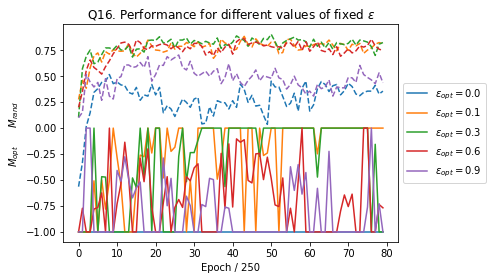

In [90]:
for i, eps in enumerate([0.0, 0.1, 0.3, 0.6,0.9]):
    plt.plot( self_eps_agent_to_results[eps][2], linestyle='dashed', color=COLORS[i])
    plt.plot( self_eps_agent_to_results[eps][3], color=COLORS[i], label=r'$\epsilon_{opt} = $'+str(eps))
    
plt.ylabel(r'$M_{opt}$      $M_{rand}$')
plt.xlabel('Epoch / 250')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Q16. Performance for different values of fixed $\epsilon$')
plt.savefig('dqn_plots/q16.png', bbox_inches='tight')
plt.show()


if eps is large, it's harder for the agent to learn

Instead of fixing eps, use eps(n) in Equation 1 with different values of n*

## Question 17
After every 250 games during training, compute the 'test' Mopt and Mrand for your agents. Plot Mopt and Mrand over time. Does decreasing eps help training compared to having a fixed eps? What is the effect of n*?

In [82]:
if TRAIN or not os.path.isfile('dqn_checkpoint/q17.pkl'):
    self_n_star_to_results={}
    for n_star in [1, 10, 100, 1000, 5000, 10000, 20000, 40000]:
        _, rewards, losses, Mrands, Mopts = self_train(decay_eps=True, max_epoch= n_star, nb_epochs=20000,seed=123)
        self_n_star_to_results[n_star] = (rewards, losses, Mrands, Mopts)

    with open('dqn_checkpoint/q17.pkl','wb') as f:
        pickle.dump(self_n_star_to_results, f)
else:
    self_n_star_to_results = pickle.load(open('dqn_checkpoint/q17.pkl','rb'))
    

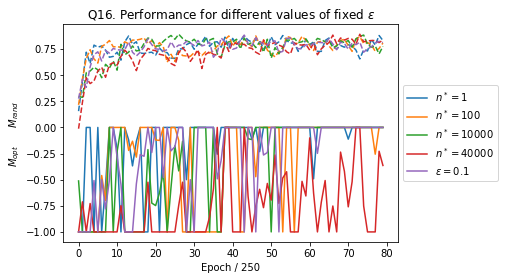

In [98]:

for i, n in enumerate([1,100,10000, 40000]):
    plt.plot( self_n_star_to_results[n][2], linestyle='dashed', color=COLORS[i])
    plt.plot( self_n_star_to_results[n][3], color=COLORS[i], label=r'$n^* = $'+str(n))
plt.plot( self_eps_agent_to_results[0.1][2], linestyle='dashed', color=COLORS[i+1])
plt.plot( self_eps_agent_to_results[0.1][3], color=COLORS[i+1],label=r'$\epsilon = 0.1$')

plt.ylabel(r'$M_{opt}$      $M_{rand}$')
plt.xlabel('Epoch / 250')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Q16. Performance for different values of fixed $\epsilon$')
plt.savefig('dqn_plots/q17.png', bbox_inches='tight')
plt.show()


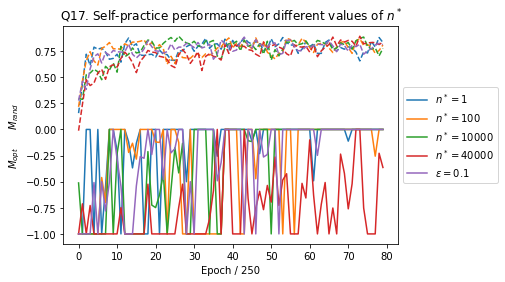

In [128]:

for i, n in enumerate([1,100, 10000,40000]):
    plt.plot( self_n_star_to_results[n][2], linestyle='dashed', color=COLORS[i])
    plt.plot( self_n_star_to_results[n][3], color=COLORS[i], label=r'$n^* = $'+str(n))
plt.plot( self_eps_agent_to_results[0.1][2], linestyle='dashed', color=COLORS[i+1])
plt.plot( self_eps_agent_to_results[0.1][3], color=COLORS[i+1],label=r'$\epsilon = 0.1$')

plt.ylabel(r'$M_{opt}$      $M_{rand}$')
plt.xlabel('Epoch / 250')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Q17. Self-practice performance for different values of $n^*$')
plt.savefig('dqn_plots/q17.png', bbox_inches='tight')
plt.show()


## Question 18
What are the highest values of Mopt and Mrand that you could achieve after playing 20000 games?

In [109]:
max(((k,max(v[2])) for k,v in self_n_star_to_results.items()), key=lambda x: x[1]) # Mrand

(1000, 0.904)

In [110]:
max(((k,max(v[3])) for k,v in self_n_star_to_results.items()), key=lambda x: x[1]) # Mopt

(1, 0.0)

In [118]:
key, value = max(((k,max(v[2])) for k,v in self_n_star_to_results.items()), key=lambda x: x[1]) # Mrand
for i, M_rand in enumerate(self_n_star_to_results[key][2]):
    if M_rand >= 0.8*value:
        print(i*250+250)
        break
for i, M_opt in enumerate(self_n_star_to_results[key][3]):
    if M_opt >= -0.2:
        print(i*250+250)
        break

1500
1250


In [111]:
max(((k,max(v[2])) for k,v in self_eps_agent_to_results.items()), key=lambda x: x[1]) # Mrand

(0.3, 0.904)

In [112]:
max(((k,max(v[3])) for k,v in self_eps_agent_to_results.items()), key=lambda x: x[1]) # Mopt

(0.1, 0.0)

## Question 19
For three board arrangements (i.e. states s), visualize Q-values of available actions (e.g. using heat maps). Does the result make sense? Did the agent learn the game well?

In [123]:
def estimate(policy_net, grid):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    nX = len(np.where(grid==1))
    nO = len(np.where(grid==-1))
    assert nX >= nO, "invalid state"
    
    if nX == nO:
        player = 'X'
    else:
        player = 'O'
        
    state = grid_to_state_tensor(grid, player, device)
    return policy_net(state).reshape(3,3).detach().cpu().numpy()

def render_grid_with_q_values(grid, q_values):
    """
    Returns a string representing the rendered grid

    Params:
        - grid: Game state to be rendered

    Returns:
        A string containing the rendered game state
    """
    value2player = {0: '--', 1: 'X', -1: 'O'}
    rendered_grid = ''
    for i in range(3):
        rendered_grid += '|'
        separator = '    <->    ' if i == 1 else '              '
        for j in range(6):
            if j < 3:
                # Render grid
                rendered_grid += value2player[int(grid[i,j])] 
                if j < 2:
                    rendered_grid += ' '
            else:
                # Render q-values
                i_q = i - 3
                j_q = j - 3
                q_val = '{:.2f}'.format(q_values[i_q, j_q]) if q_values[i_q, j_q] < 0 else ' {:.2f}'.format(q_values[i_q, j_q])
                if j == 3:
                    rendered_grid += '|' + separator + '|' + q_val
                else:
                    rendered_grid += ' ' + q_val
        rendered_grid += '|'
        if i < 2:
            rendered_grid += '\n'

    return rendered_grid

def plot_grids_heatmap(policy_net, grids, path='./q19'):  
    """
    Plots and saves 
    """
    fig = plt.figure(figsize=(20, 5))
    axes = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]

    for idx, grid in enumerate(grids):
        state = tuple(grid.flatten())
        if sum(state) < 0:
            raise ValueError('An invalid grid has been chosen. Player X -> 1 always starts.')
        if sum(state) > 1:
            raise ValueError('An invalid grid has been chosen. The two players X -> 1 and O -> -1 always play one after the other.')
        q_values = np.ones(grid.shape)*-1
        try:
            q_values = estimate(policy_net,grid)
            sns.heatmap(q_values, ax=axes[idx], square=True)
            axes[idx].set_title(render_grid_with_q_values(grid, q_values), loc='center')
        except:
            raise ValueError('The game has already been finished or the current state has not been encountered.')

    plt.savefig(path,  bbox_inches='tight')

In [125]:
if TRAIN or not os.path.isfile('dqn_checkpoint/q19.pt'):
    policy_net,_,_,_,_ = self_train(decay_eps=True, max_epoch=100000, nb_epochs=20000, eval_every=-1)

    torch.save(policy_net,'dqn_checkpoint/q19.pt')
else:
    policy_net = torch.load('dqn_checkpoint/q19.pt')
    


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:37<00:00, 91.76it/s]


Learning finished after 217.96s
Played a total of 20000 games


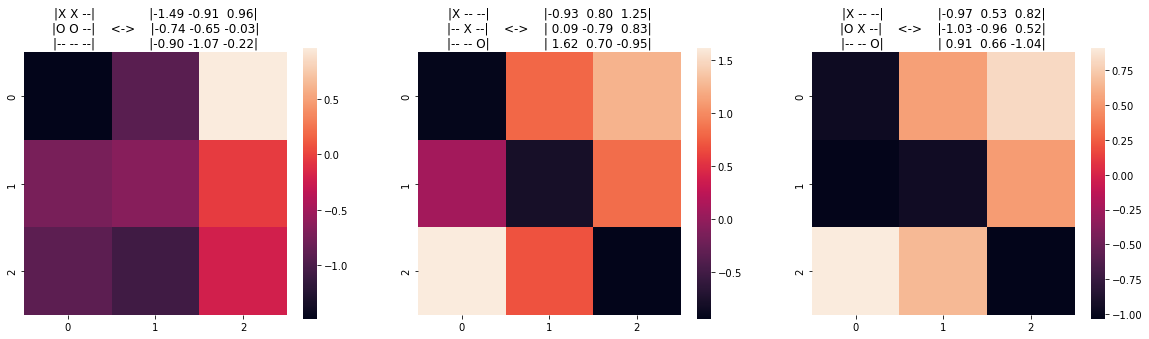

In [127]:
grid0 = np.array([[1,1,0],
                [-1,-1,0],
                [0,0,0]])

grid1 = np.array([[1,0,0],
                [0,1,0],
                [0,0,-1]])

grid2 = np.array([[1,0,0],
                [-1,1,0],
                [0,0,-1]])

plot_grids_heatmap(policy_net, [grid0, grid1, grid2],'dqn_plots/q19.png')
